# Obtendo os clusters (aula 2)

Qual o risco de os meus clientes atrasarem o pagamento da fatura? r:baixo médio e alto
qual o comportamento dos meus clientes com o cartão de crédito? fica difícil responder.
Vamos agrupar os clientes com características similares. Para isso vamos usar o Cluster
2 fase: interpretar os clusters
3 como utilizar os clusters para tomar decisão

Cluster é um tipo de Aprendizado Não Supervisionado. Você cria parametros observando padrões nos dados. É diferente de classificação.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('CC GENERAL.csv')
dados.drop(columns =["CUST_ID","TENURE"], inplace = True)#essas colunas são inúteis
dados.head()
#precisamos limpar nossa base de dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing = dados.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
dados.fillna(dados.median(), inplace = True)
missing = dados.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dados.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [ ]:
#fazendo o cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 5, n_init= 10, max_iter = 300)
y_pred = kmeans.fit_predict(values) #agora vamos validar esse cluster. ver oq significa essa variavel

#Entendendo os critérios e métricas de validação (aula 3)

Vamos validar os clusters(vai dizer se vale a pena mantê-los para a parte de interpretação)

Métricas de validação: Externas e Internas (precisam de labels, não precisam de labels)

  Critérios de validação
**Compactação**: quanto mais próximos os pontos de um cluster, mais compacto ele está (quanto mais ocmpacto melhor)
Separação: Quão bem separados estão os pontos em clusters diferentes(quanto mais longe os clusters estiverem um do outro)


  Vamos usar o coeficiente de silhouette
  s= b-a/max(a,b): se s > 0 os clusters são VÁLIDOS
  a: média da distancia euclidiana de um ponto a cada ponto a todos os outros do mesmo cluster
  b: distancia média entre o ponto e todos os outros pontos do cluster mais próximo


In [ ]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette) # deu positivo, então está validado

0.36454479258047573


#Entendendo e Calculando (aula 4)

Indice de Davies-Bouldin:  
 Rij = (si + sj) / Dij
si: similaridade dentro do cluster (dist média entre cada ponto cdo cluster e seu CENTROIDE)
sj: similatidade entre os cluster
Dij: distancia entre os centroides dos clusters

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels) # (sai direto e n precisa fazer todas as contas da teoria)
print(dbs) # QUANTO MENOR, MELHOR

1.0760464906093192


# Entendendo e calculando o Índice Calinski (aula 5)

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski #Agora temos os 3 valores: davies bouldin, silhouete e calinski

3431.7903477169225

# Validando os clusters (aula 6)

6.1 Validação Relativa

In [ ]:
#Queremos comparar os resultados (variando o número de clusters)
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric ='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [ ]:
s1,dbs1,calinski1 = clustering_algorithm(3,values)#com 3 clusters
print(s1,dbs1,calinski1)

0.32713125147759076 1.310519044581389 3526.4499037127507


In [ ]:
s2,dbs2,calinski2 = clustering_algorithm(5,values)#com 5 clusters
print(s2,dbs2,calinski2)#s aumenta, dbs diminui, calinski cai um pouco. Quanto maior, melhor  para s e calinski. Quanto menor o dbs melhor)

0.36454314826693845 1.075812734747931 3431.8005407346513


In [ ]:
s3,dbs3,calinski3 = clustering_algorithm(50,values)#com 50 clusters
print(s3,dbs3,calinski3)#cai muito (ruim), dbs fica entre o de 3 e o de 5, calinski diminui muito.
#Vamos escolher o com 5 clusters, pq o s2 tá maior (isso é bom, pois o silhouete é popular([E melhor usar como o parametro mais importante]))

0.25411722523731434 1.2374215902303787 1614.0859381984164


6.2 Estrutura do cluster

In [ ]:
#geraremos um conjunto de dados aleatório com valores
import numpy as np
random_data = np.random.rand(8950,16) #temos 8950 dados e 16 variaveis. 
#Estamos um conjunto de dados com valores aleatórios entre 0 e 1. 
#Estamos meio que comparando os valores dos indices do nosso banco de dados com um valor "dummy".
s ,dbs, calinski = clustering_algorithm(5,random_data)
print(s,dbs,calinski)
print(s2,dbs2,calinski2)#o que a gente tinha pegado.
#vemos que o silhuetatá muito pior, o dbs está bem melhor, e o Calinski muito pior. Concluimos que é importante analisar o dado COMPLETO.
#Uma amostra apresenta coeficientes completamente diferente do dado completo.
#

0.03952377354278284 3.525980632485812 302.5325452384054
0.36454314826693845 1.075812734747931 3431.8005407346513


6.3 estabilidade dos clusters

In [ ]:
set1,set2,set3=np.array_split(values, 3) #dividimos os dados em 3 conjuntos para ver se é estável.
s1,dbs1,calinski1=clustering_algorithm(5,set1)
s2,dbs2,calinski2=clustering_algorithm(5,set2)
s3,dbs3,calinski3=clustering_algorithm(5,set3)
print(s1,dbs1,calinski1)
print(s2,dbs2,calinski2)
print(s3,dbs3,calinski3)#como os valores são bem parecidos, notamos que o cluster é estável

0.36908155221853267 1.0580445685596032 1204.0558494933455
0.35406999696241026 1.1389554530299946 1194.9454119497238
0.36711806123637947 1.0983674003891761 1167.5043802024989


# Visualizando os clusters (aula 7)

<function matplotlib.pyplot.show>

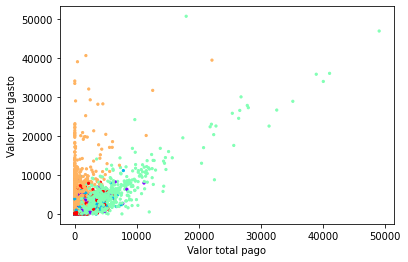

In [ ]:
#já validamos os clusters, agora vamos tentar visualizá-los
import matplotlib.pyplot as plt
plt.scatter(dados['PURCHASES'],dados['PAYMENTS'], c = labels, s=5, cmap = 'rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show#percebemos que só conseguimos visualizar 2 clusters. Cadê os outros?
#vemos que o cluster roxo parece ser uma reta na vertical, enquanto o laranja uma diagonal.
#parece que o roxo são os clientes que gastaram, mas não pagaram a fatura
#o laranja indica os clientes que pagaram o valor da fatural. 
#Essas informações não foram suficientes para entender melhor nosso cluster

In [ ]:
import seaborn as sns
dados["cluster"] = labels
sns.pairplot(dados[0:], hue = "cluster") #gerou MMMUIIITOS GRAFICOS. A VISIALIZACAO as vezes não nos ajuda (¬¬)

# Entendendo os valores dos atributos no cluster (aula 8)

In [ ]:
dados.groupby("cluster").describe()#conseguimos fazer uma analise superficial. Mas para visualizar, seria necessário selecionar somente alguns atributos. Vamos tentar escolher 5 atributos que representam bem o resto

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         412.0  1987.146873  1852.215743  70.794108  1020.146724   
1        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
2        1536.0  1141.865757  1664.809840   0.000000   212.178230   
3        1073.0  1795.328292  1982.485775   0.000000   507.076999   
4        3279.0   443.776995   846.525522   0.000000    23.340435   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1338.918346  2133.415063  11670.179850             412.0  0.989512   
1        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
2         554.332740  1370.056708  19043.138560            1536.0  0.928220   
3        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
4          82.902896   410.659944   9630.367575            3279.0  0.774514   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7086.774783  76406.207520            412.0  0.019271   
1        ...      1330.541571   8345.641905           2650.0  0.001798   
2        ...       523.540210  18621.013310           1536.0  0.278331   
3        ...       884.183626  21235.065300           1073.0  0.117430   
4        ...       248.766884   4483.503862           3279.0  0.246881   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090795  0.0  0.0  0.000000  0.000000  1.0  
1        0.023256  0.0  0.0  0.000000  0.000000  0.6  
2        0.367137  0.0  0.0  0.083333  0.545455  1.0  
3        0.186772  0.0  0.0  0.083333  0.142857  1.0  
4        0.346775  0.0  0.0  0.000000  0.444444  1.0  

[5 rows x 128 columns]

In [ ]:
#vamos aprender uma estratégia para defini-los
centroids = kmeans.cluster_centers_
print(centroids)# cada lista é o valor de cada um dos 16 atributos para o cluster 1,2...5

[[3.33483624e-01 2.68969713e-04 1.59146477e-01 3.61931219e-02
  1.23336164e-01 5.80731211e-02 1.67333390e-04 2.64804728e-05
  1.47698430e-04 1.92281888e-05 4.25862512e-04 3.87053484e-03
  3.77114118e-01 2.52735252e-01 6.78741705e-01 4.21940580e-06]
 [5.03891140e-01 2.72065441e-04 6.16784840e-02 3.62286727e-02
  2.54715081e-02 2.53124190e-01 6.71292796e-05 2.56664751e-05
  4.48879263e-05 5.75142079e-05 1.15750440e-03 1.32821803e-03
  7.19392335e-01 1.66094190e-01 1.79043435e-01 5.79442214e-07]
 [1.59872633e-01 2.45335780e-04 4.38628565e-01 2.57276648e-01
  1.81523763e-01 2.58896564e-02 2.04405504e-04 8.91003532e-05
  1.50573918e-04 9.39953463e-06 1.70012472e-04 6.17608469e-03
  6.03886132e-01 4.02529446e-01 8.52570022e-02 7.19925505e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [6.

In [ ]:
#vamos procurar os atributos que variam muito pouco (baixa variancia) para cada cluster
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i],"\n{:.4f}".format(centroids[:,i].var())) #vamos escolher os atributos com as maiores variancia: balance, purcharses,cash_advance,credit_limit, payments

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0541
PRC_FULL_PAYMENT 
0.0000


In [ ]:
#vamos pegar cada cluster e ver esses atributos escolhidos
descricao = dados.groupby("cluster")["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]
n_clients = descricao.size()
descricao = descricao.mean()
descricao['n_clients'] = n_clients
print(descricao)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
1        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
2        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
3        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
4         443.776995   629.282729    140.652097   5130.892579   814.340168   

         n_clients  
cluster             
0              412  
1             2650  
2             1536  
3             1073  
4             3279  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


#Interpretando os cluster (aula 9)

In [ ]:
#agora sim vamos analisar nossos clusters
cluster 0: clientes que gastam pouco, possuem o maior limite, são bons pagadores, e são o maior numero de clientes
cluster 1: clientes que mais gastam, o foco deles é o saque, piores pagadores e boa quantidade de clientes
cluster 2: clientes que gastam muito com compras  e são os melhores pagadores
cluster 3: clientes que gastam muito com saques e pagam as vezes
cluster 4: clientes com o menor limite, não são bons pagadores e são a menor quantidade de clientes

-o cluster 0 seria o melhor grupo de clientes. Projetos e insentivos de para aumentear o consumo/lucro deveria ser focalizado neles. 



-o cluster 2 também também seriam uma boa opção. O limite de crédito pode ser aumentado, já que são os melhores pagadores e possuem um limite médio
